In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import time

In [32]:
#Default hyperparameters#
N_NEIGHBORS = 100
LOCAL_OUTLIER_FACTOR_THRESHOLD = 1.5
#################

In [33]:
class LocalOutlierFactor:
    def __init__(self, n_neighbors=N_NEIGHBORS,local_outlier_factor_threshold=LOCAL_OUTLIER_FACTOR_THRESHOLD, eps = 1E-30):
        self.n_neighbors = n_neighbors
        self.local_outlier_factor_threshold = local_outlier_factor_threshold
        self.eps = eps
        self.neighbors = NearestNeighbors(n_neighbors=self.n_neighbors + 1) # one additional neighbor for finding the k neighbors of points in the training dataset excluding itself 
    
    def fit(self, train_oneclassdata):
        self.train_oneclassdata = np.unique(train_oneclassdata, axis=0)
        self.neighbors.fit(self.train_oneclassdata)
        self.k_distance_list = self.k_distance_and_indices(self.train_oneclassdata,withinDataset=True)[0][:,-1]
        self.neighborhood_density_list = self.calculate_neighborhood_density(self.train_oneclassdata)
        return self
    
    def k_distance_and_indices(self, X, withinDataset = False):
        distances, indices = self.neighbors.kneighbors(X)
        if(withinDataset):
            return distances[:,1:], indices[:,1:]
        else:
            return distances[:,:-1],indices[:,:-1]
    
    def calculate_neighborhood_density(self,X):
        k_distances, k_nearest_neighbours = self.k_distance_and_indices(X)
        k_d_reach =  np.maximum(k_distances,self.k_distance_list[k_nearest_neighbours])
        neighborhood_density = (self.n_neighbors * 1.0)/(np.sum(k_d_reach,axis=-1)+self.eps)        
        return neighborhood_density
    
    def calculate_local_outlier_factor(self, X):
        neighbors = self.k_distance_and_indices(X)[1]
        neighborhood_density = self.calculate_neighborhood_density(X)
        localOutlierFactor = np.mean(self.neighborhood_density_list[neighbors],axis=-1)/neighborhood_density
        return localOutlierFactor
        
    def predict(self,X):
        return self.calculate_local_outlier_factor(X) > self.local_outlier_factor_threshold

Outlier predictions: 461
Inlier predictions: 113039
Outlier actuals: 445
Inlier actuals: 113055
Accuracy score: 99.984%
F1 score: 0.98
Time taken: 14.618269920349121


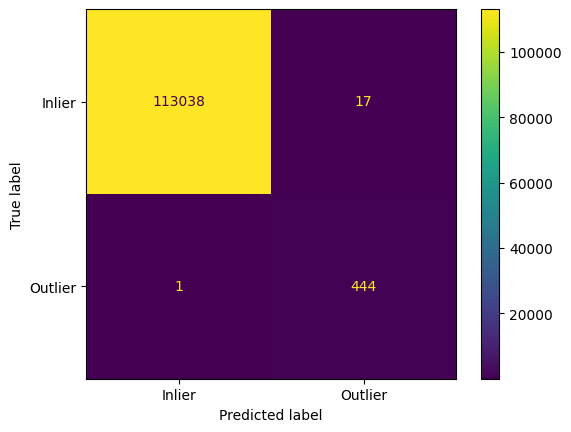

In [34]:
#Application-specific hyperparameters#
N_NEIGHBORS = 100
LOCAL_OUTLIER_FACTOR_THRESHOLD = 4
#################

df = pd.read_csv('http.csv')
time_start = time.time()   
trainx, testx, trainy, testy = train_test_split(df.drop(['attack'], axis=1).values, df['attack'].values, test_size=0.2,random_state=42)
localOutlierFactorClassifier = LocalOutlierFactor(n_neighbors=N_NEIGHBORS,local_outlier_factor_threshold=LOCAL_OUTLIER_FACTOR_THRESHOLD).fit(trainx[trainy == 0])

#prediction
testy_pred = localOutlierFactorClassifier.predict(testx)

#show confusion matrix to check directional accuracy
cm = confusion_matrix(testy>0, testy_pred>0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Inlier','Outlier'])
disp.plot()
print("Outlier predictions:",np.sum(testy_pred>0))
print("Inlier predictions:",np.sum(testy_pred<=0))
print("Outlier actuals:",np.sum(testy>0))
print("Inlier actuals:",np.sum(testy<=0))
print(f'Accuracy score: {accuracy_score(testy>0, testy_pred>0) :>.3%}')
print(f'F1 score: {f1_score(testy>0, testy_pred>0) :>.3}')
time_end = time.time()
print("Time taken:",time_end-time_start)
plt.show()


Outlier predictions: 41
Inlier predictions: 73
Outlier actuals: 43
Inlier actuals: 71
Accuracy score: 91.228%
F1 score: 0.881
Time taken: 0.14125609397888184


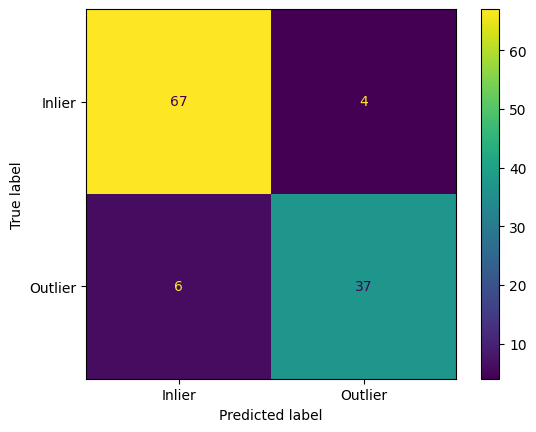

In [38]:
#Application-specific hyperparameters#
N_NEIGHBORS = 100
LOCAL_OUTLIER_FACTOR_THRESHOLD = 1.5
#################

df = pd.read_csv('cancer.csv')
time_start = time.time()   
trainx, testx, trainy, testy = train_test_split(df.drop(['diagnosis'], axis=1).values, df['diagnosis'].values, test_size=0.2,random_state=42)
localOutlierFactorClassifier = LocalOutlierFactor(n_neighbors=N_NEIGHBORS,local_outlier_factor_threshold=LOCAL_OUTLIER_FACTOR_THRESHOLD).fit(trainx[trainy == 0])

#prediction
testy_pred = localOutlierFactorClassifier.predict(testx)

#show confusion matrix to check directional accuracy
cm = confusion_matrix(testy>0, testy_pred>0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Inlier','Outlier'])
disp.plot()
print("Outlier predictions:",np.sum(testy_pred>0))
print("Inlier predictions:",np.sum(testy_pred<=0))
print("Outlier actuals:",np.sum(testy>0))
print("Inlier actuals:",np.sum(testy<=0))
print(f'Accuracy score: {accuracy_score(testy>0, testy_pred>0) :>.3%}')
print(f'F1 score: {f1_score(testy>0, testy_pred>0) :>.3}')
time_end = time.time()
print("Time taken:",time_end-time_start)
plt.show()
